# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

 **Data Set Overview
Load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mydata_df = pd.read_csv('/content/drive/MyDrive/PROJECTBIKESHARING/SeoulBikeData.csv',encoding='ISO-8859-1')
mydata_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
print('Shape of data: ', mydata_df.shape)

Shape of data:  (8760, 14)


The provided data consists of over 8k observations with 14 column variables (excluding the datetime column - which has been used as an index)

In [ ]:
#checking details about the data
mydata_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
mydata_df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


**Feature Statistics Summary**

Below table provides the statistical details for each column.

In [ ]:
#Looking for the description of the dataset to get insights of the data
mydata_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**This Dataset contains 8760 lines and 14 coloums.**

**In a day we have 24 hours and we have 365 days a year so 365 * 24 = 8760**









In [ ]:
# getting all the coloumns
print("Features of the dataset:")
mydata_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#print the unique values
mydata_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**FEATURES BREAKDOWN**

*   Date : The date during 365 days from 01/12/2017 to 30/11/2018.

*   Rented Bike count - Number of rented bike per hour which is depedent variable and we need to predict that type: int.

*   Hour - Hour of he day its int type starting from 0-23 digital.

*   Temperature-Temperature in Celsius type : float

*   Humidity - humidity in temp % : int

*   Windspeed - m/s type : float

*   Visibility - 10m type: int

*   Dew point temperature - Celsius type: float

*   Solar radiation - MJ/m2 type: float

*   Rainfall - mm type: float

*   Snowfall - cm type: float

*   Seasons - Winter, Spring, Summer, Autumn type: str

*   Holiday - if the day is holiday period or not type: str

*   Functioning Day - if the day is functioning typr ot not type: str  
   



**PREPROCESSING THE DATASET**

Why do we need to handel missing values?
* The  real-world data often has a lot of missing values. The cause of missing values can be data corruption or faliure to record data.The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why necessary to check missing values.


In [ ]:
# check for count of missing values in each coloumn.
mydata_df.isna().sum()
mydata_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

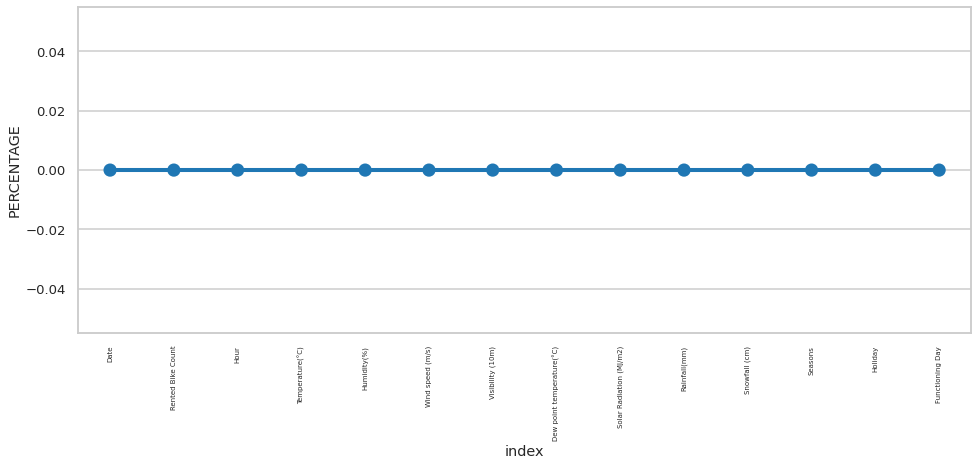

In [ ]:
missing =pd.DataFrame((mydata_df.isnull().sum())*100/mydata_df.shape[0]).reset_index()
plt.figure(figsize=(16,6))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90,fontsize =7)
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#checking for duplicate values
value=len(mydata_df[mydata_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0




*   In the above data after the missing and duplicate value we came to know that there are no missing and duplicate values.
*   Some of the coloumns name in the datset are too large and clumsy so we change the info into simple name.



In [ ]:
#changing the "Data" column into three "year","month","day" column
mydata_df['Date'] = mydata_df['Date'].apply(lambda x:
                                      dt.datetime.strptime(x,"%d/%m/%Y"))


In [ ]:
mydata_df['year'] = mydata_df['Date'].dt.year
mydata_df['month'] = mydata_df['Date'].dt.month
mydata_df['day'] = mydata_df['Date'].dt.day_name()


In [ ]:
#creating a new coloumn of "weekdays_weekend" and drop the column "Date","day","year"
mydata_df['weekdays_weekend']=mydata_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
mydata_df=mydata_df.drop(columns=['Date','day','year'],axis=1)



*   So we convert the "date" column into 3 different column i.e:"year","month","day".
*   The "year" column in our data set is basically contain the 2 unique number contains the deatils of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year"coloumn so we drop it
*   The other column "day",it contains the details about the each day of the month, for our relevance we don't need each day of each month data but we need the data about,if a day is a weekday or a weekend so we convert it into this fromat and drop the "day" column 



In [ ]:
mydata_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
mydata_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

**CHANGING DATA TYPE**

*   As"Hour","month","weekdays_weekend"coloumn are show as an integer data type but actually it is a category data type. So we needd to change this typeif we not then,while doing the further analysis and correleated with this then the values are not actually true so we can mislead by this.




In [ ]:
mydata_df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

In [ ]:
#Change the int64 column into category coloumn
cols=['Hour','month','weekdays_weekend']
for col in cols:
  mydata_df[col]=mydata_df[col].astype('category')

In [ ]:
#lets check the reasult of data type
mydata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [ ]:
mydata_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [ ]:
mydata_df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

**EXPLORATORY DATA ANALYSIS OF THE DATA SET**

**Why do we perform EDA?**

*  An EDA is a thorough examination meant to uncover the underlying structure of a dataset and is important for a company because it exposes trends,pattern,and relationship that are not readily apparent.

**UNIVARIATE ANALYSIS**

**Why do you do univariate analysis?**

*  The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

**ANALYSIS OF DEPENDENT VARIABLE**

* We analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.


**ANALYSATION OF CATEGORICAL VARIABLE**

*  Our dependent variable is "Rented Bike Count"so we need to analysis this coloumn with the other columns by using some visulisation plot.first we analyze the category data type then we proceed with the numerical data type

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO MONTH')]

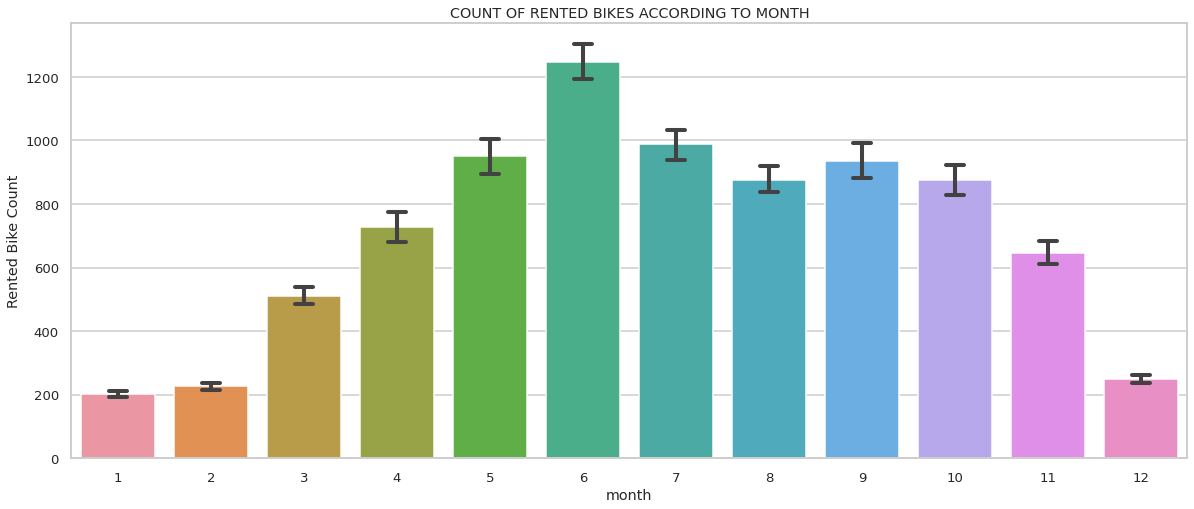

In [ ]:
#analysis of data vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=mydata_df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO MONTH')

*  From the above bar plot we can clearly say that the month 5 to 10 the demand of the rented bike is high as compare to other months . Thesemonths are of summer season.

**WEEKDAYS_WEEKEND**

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO WEEKDAYS & WEEKENDS')]

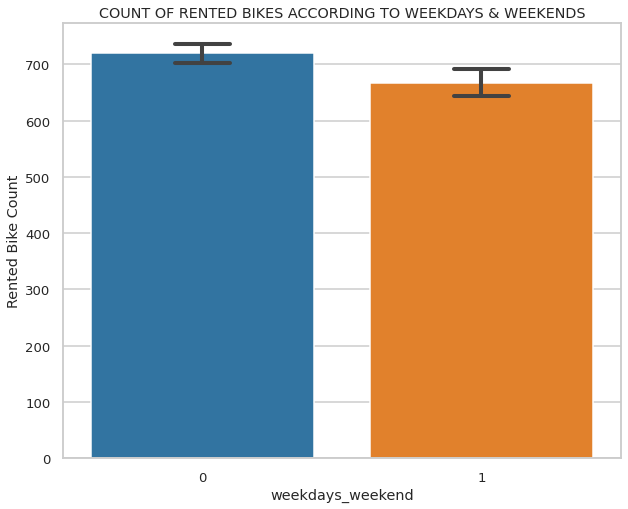

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=mydata_df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO WEEKDAYS & WEEKENDS')

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO weekdays_weekend')]

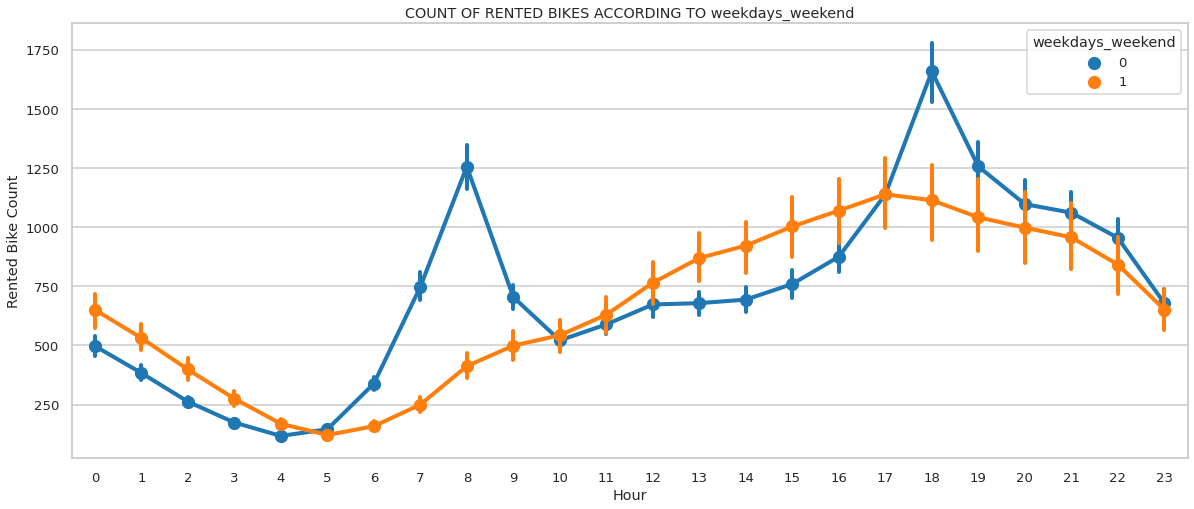

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=mydata_df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO weekdays_weekend')



*   From the above point plot and bar plot we can say that in the week days which represent in blue colour show that the demand of the bike higher because of the office.
*   Peak Time are 7 am to 9 am and 5 pm to 7 pm

*   The orange colour represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.


**HOUR PLOT**

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO HOUR')]

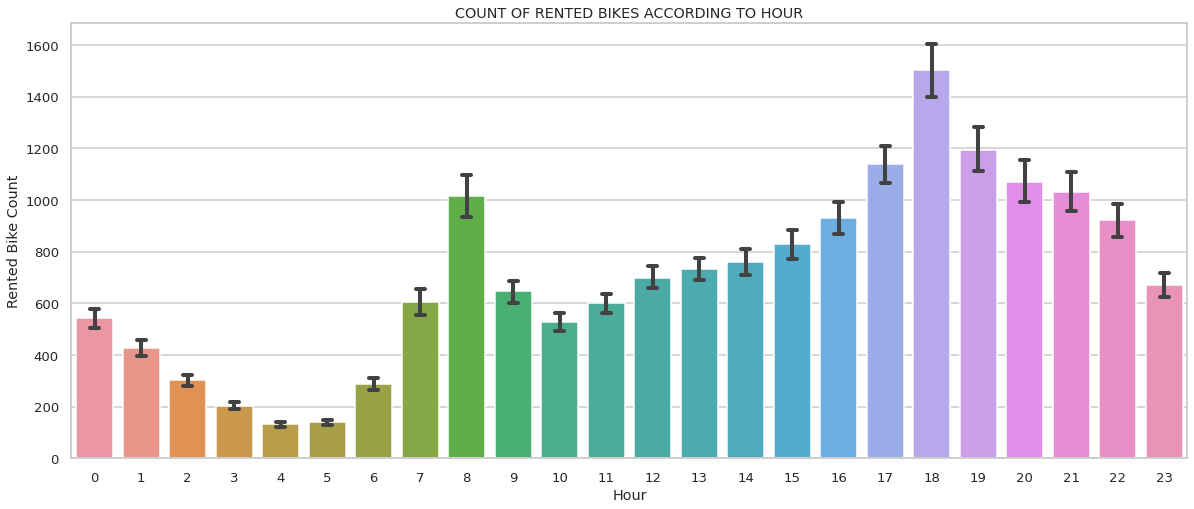

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=mydata_df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO HOUR')



*   In the above plot which shows the use of rented bike according the hours and adta are from all over the year
*   Generally people use rented bikes during their working hour 7 am to 9 am and 5 pm to 7 pm.



**FUNCTIONING DAY**

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO FUNCTIONING DAY')]

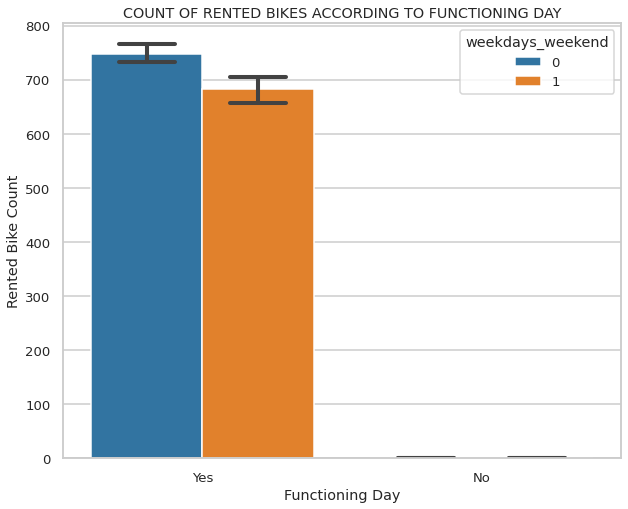

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=mydata_df,x='Functioning Day',y='Rented Bike Count',hue='weekdays_weekend',ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO FUNCTIONING DAY')

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO FUNCTIONING DAY')]

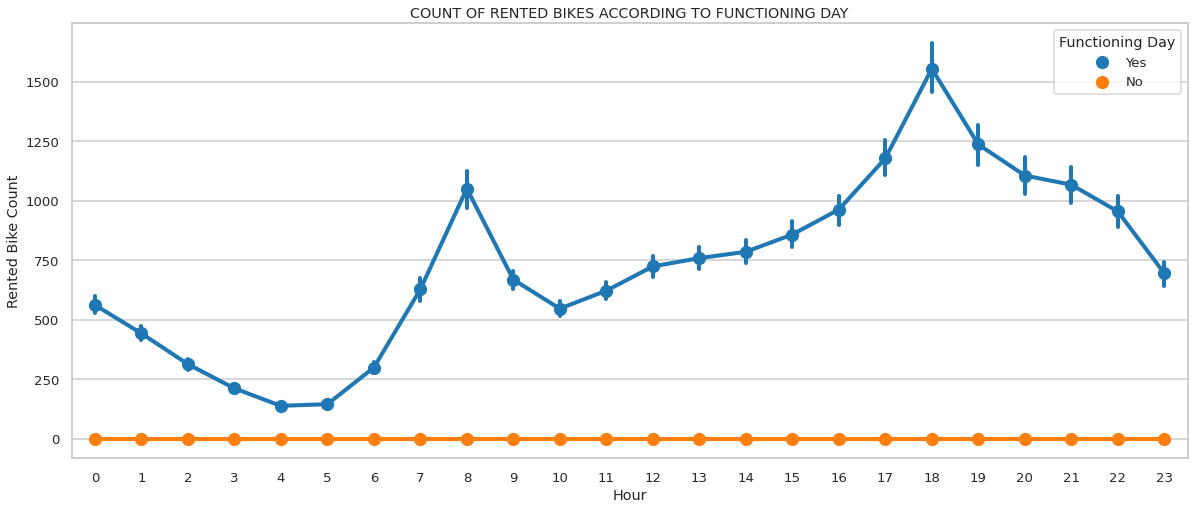

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=mydata_df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO FUNCTIONING DAY')



*   In the above bar plot and point which shows the use of rented bike in functioning days or not, and it clearly shows that people do not use rented bike on functioning day.







   **SEASONS**



[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO SEASONS')]

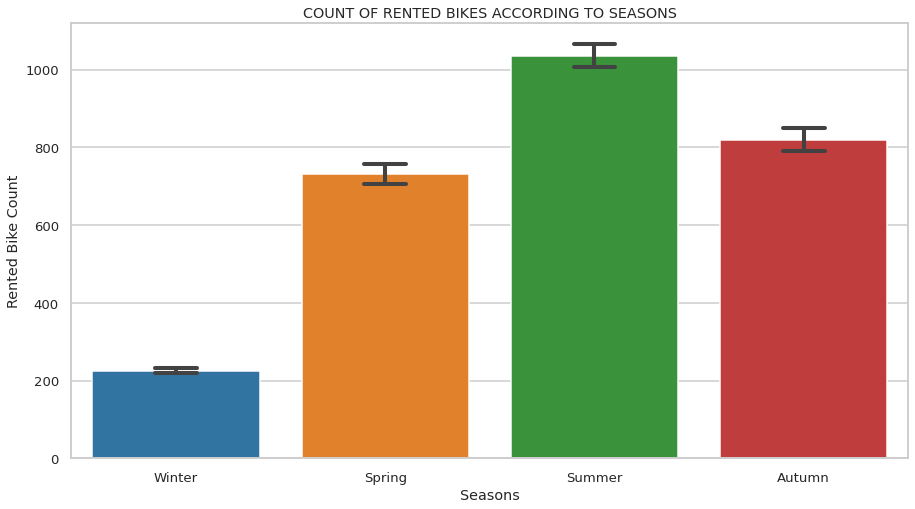

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=mydata_df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO SEASONS')

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO SEASONS')]

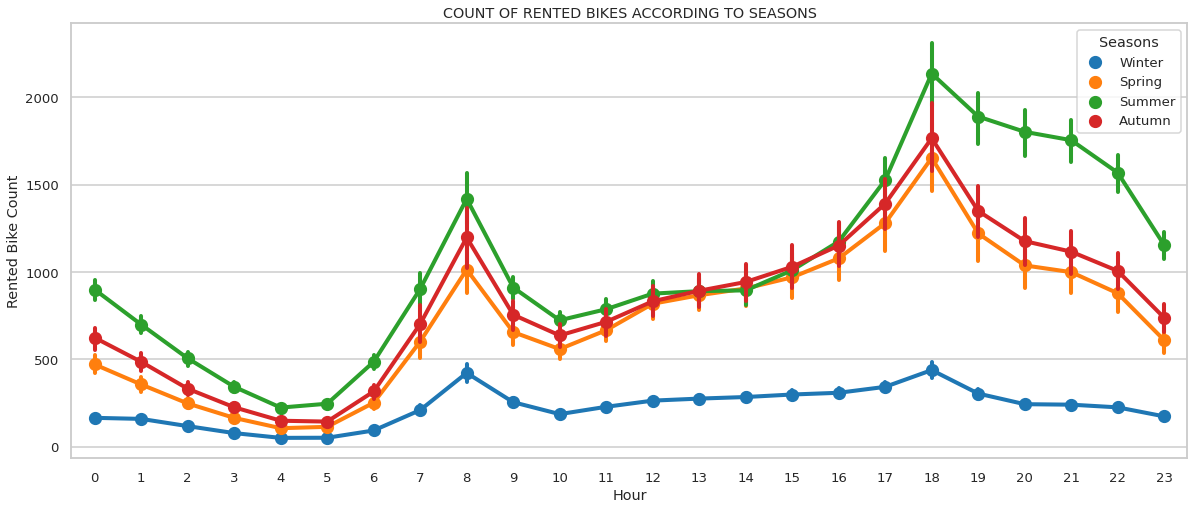

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=mydata_df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO SEASONS')



*   In the above bar plot and point plot which shows the use of rented bike in the four different seasons, and it clearly shows that ::
*   In summer season the use of rented bike is high and peak time is 7 am -9 am and 7 pm - 5 pm.
*   In the winter seasons the use of rented bike is very low because of snowfall.


**HOLIDAY**



[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO HOLIDAY ')]

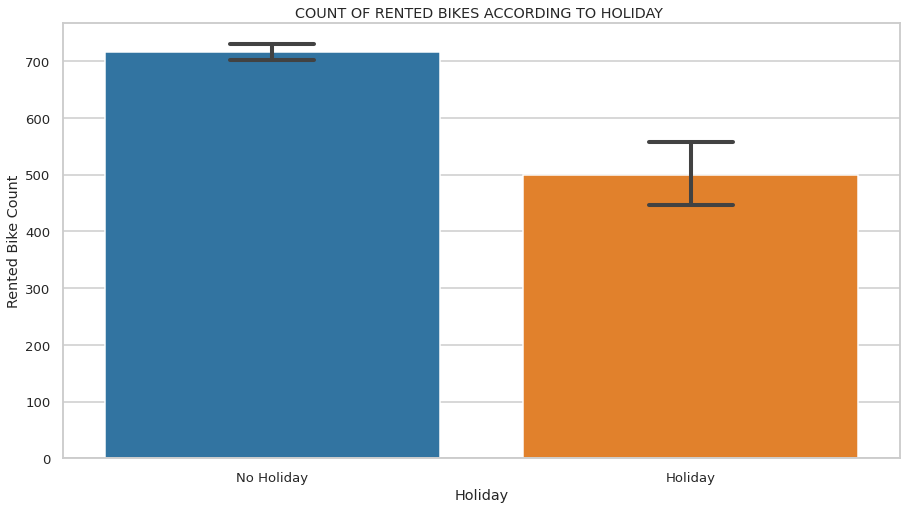

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=mydata_df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO HOLIDAY ')

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ACCORDING TO HOLIDAY')]

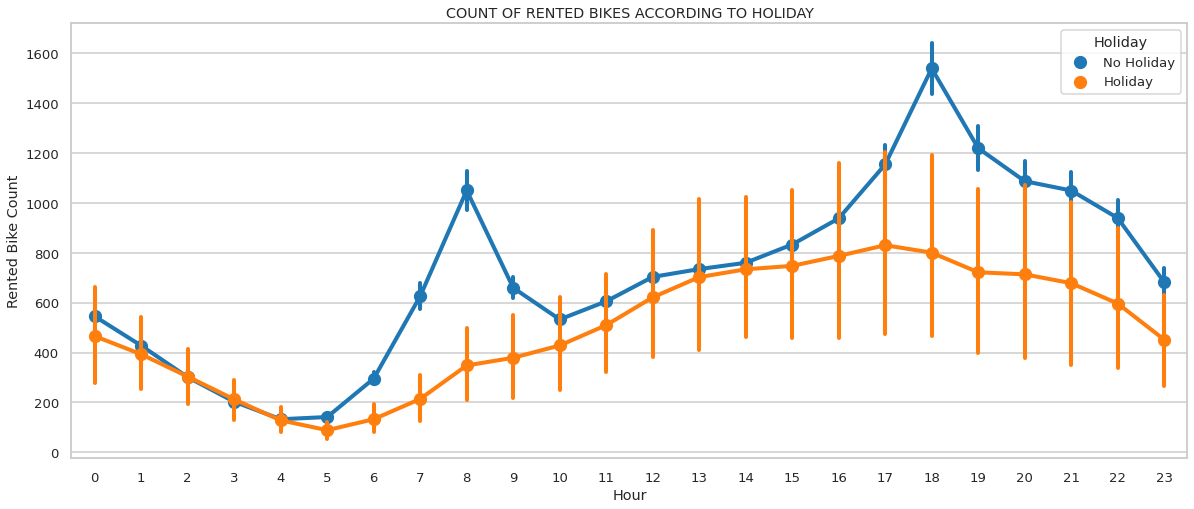

In [ ]:
#Analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=mydata_df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='COUNT OF RENTED BIKES ACCORDING TO HOLIDAY')

**ANALYZE OF NUMERICAL VARIABLES**



*   Numerical data is a type of data type expressed in numbers, rather than natural language description.Sometimes called quantitative data, numerical data is always collected in number form.Numerical data differentitates itself from other data types with its ability to carry our arthmetic operations with these numbers.




In [ ]:
#assign the numerical coloumn to variable
numerical_columns=list(mydata_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

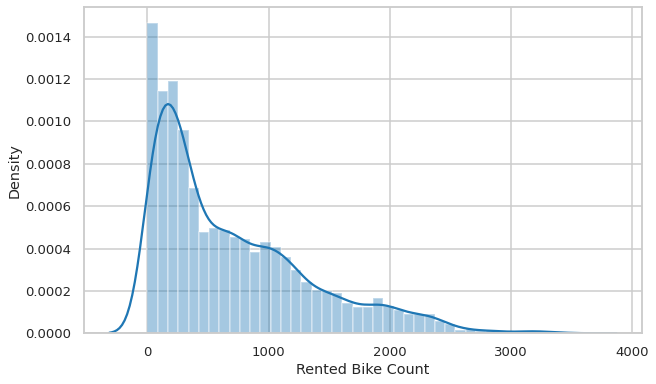

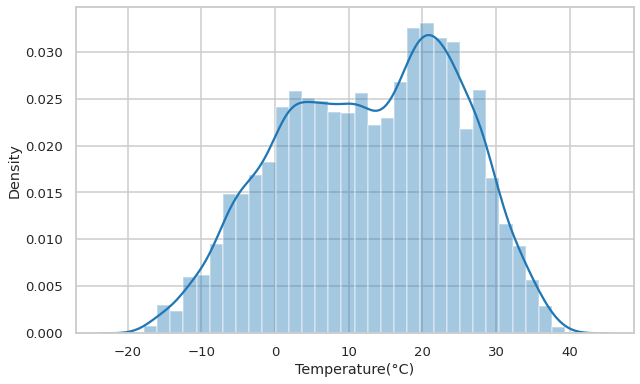

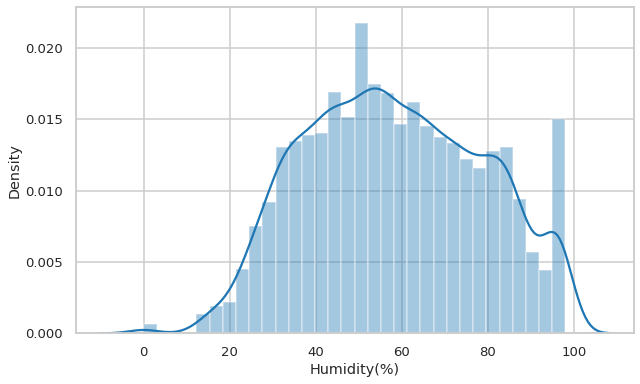

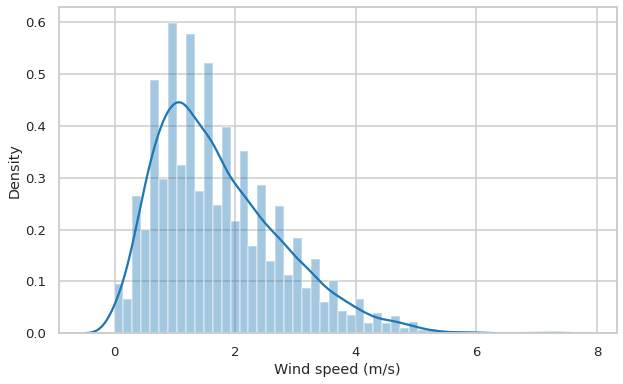

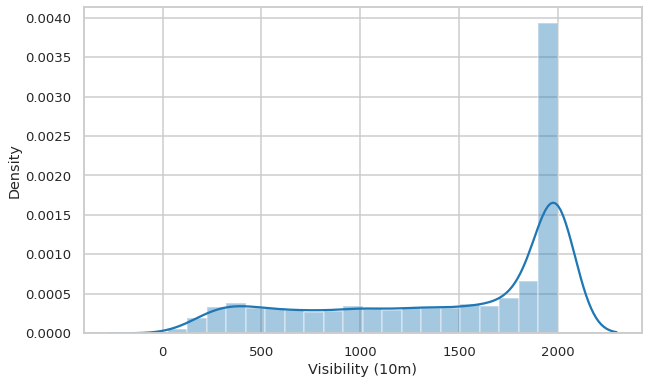

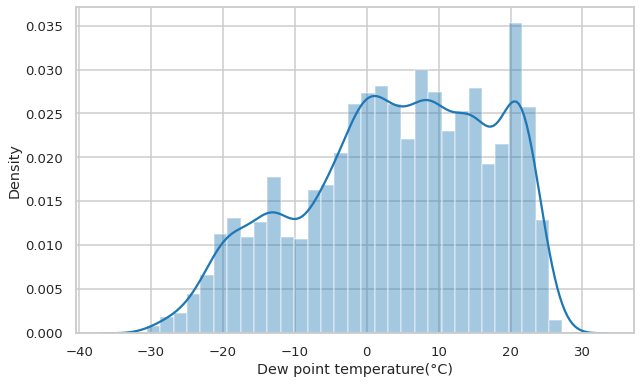

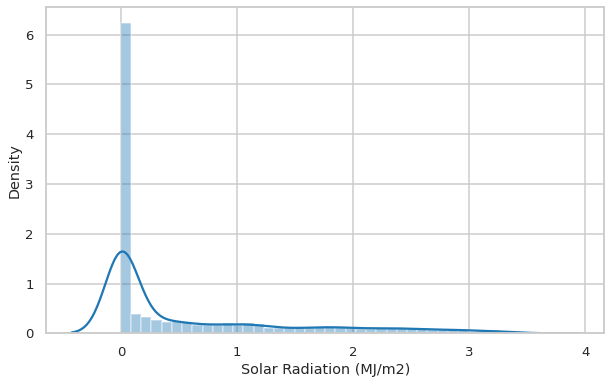

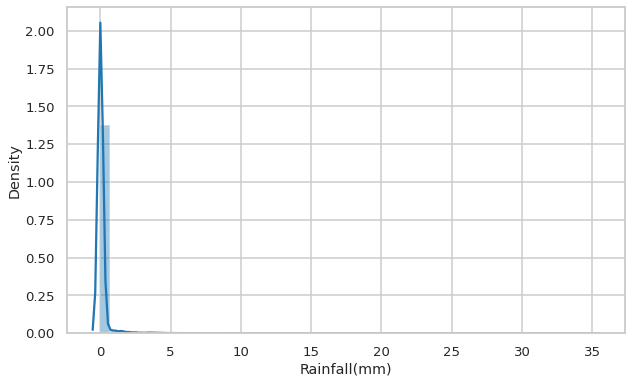

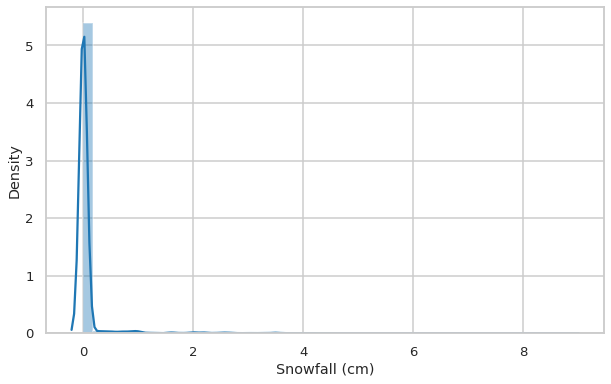

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=mydata_df[col])
  plt.xlabel(col)
  plt.show()

**NUMERICAL VS RENTED BIKE COUNT**

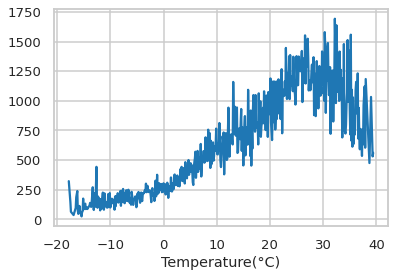

In [ ]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Temperature"
mydata_df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()



*   From the above plot we can see that people like to ride bikes when its pretty arrounf 25°C.




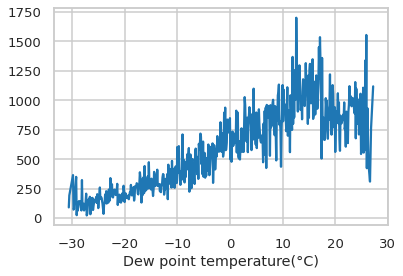

In [ ]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Dew point temperature(°C)"
mydata_df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()



*   From the above plot of 'Dew point temperature(°C)'is almost same as the 'temperature' there is some similarity present we can check it in ournext step.




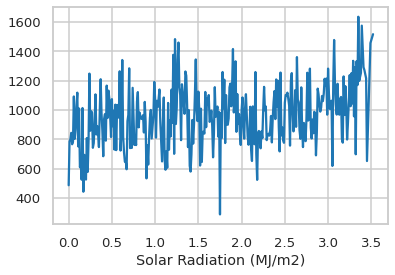

In [ ]:
#print the plot to analyze the relationship between "Rented Bike Count" and "'Solar Radiation (MJ/m2)'"
mydata_df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()



*   From the above plot we see that , the amount of rented bikes is huge, when there is solar radiation,the counter of rents is arrounf 1000




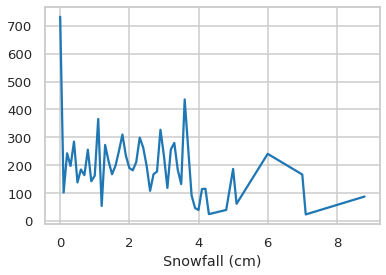

In [ ]:
#print the plot to analyze the relationship between "Rented Bike Count" and "'Snowfall (cm)'"
mydata_df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()



*   We can see from the plot that, on the y-axis,the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower. 




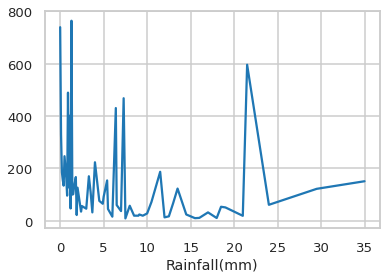

In [ ]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Rainfall(mm)"
mydata_df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()



*   From above plot we can see even if it rains a lot the demand for the rent bike is not decreasing,here for 20mm rain there is a huge demand for rented bikes.




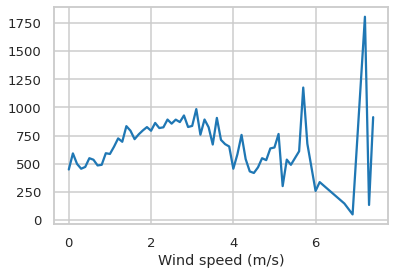

In [ ]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Wind speed (m/s)"
mydata_df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

*   We can see from above plot that the demand of rented bikes is uniformaly distributed despite of wind speed but when the speed limit was 7 m/s then the demand of bike also increased that clearly means people love to ride bike when it's little windey.



**REGRESSION PLOT**

*   The regression plots in seaborn are primarily intented to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses .regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

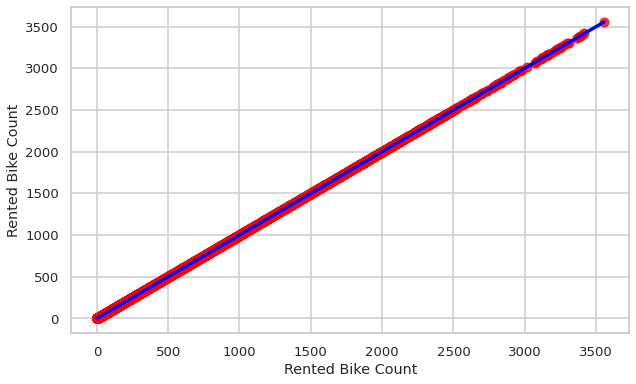

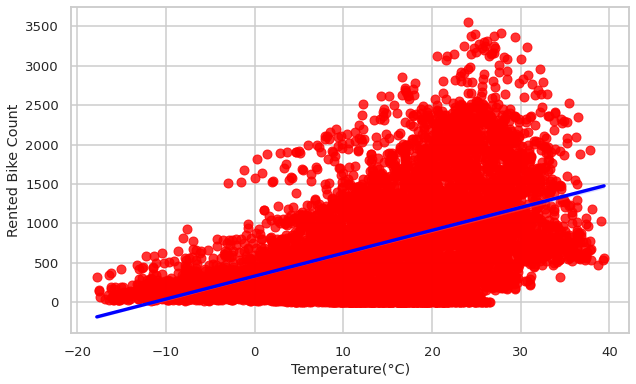

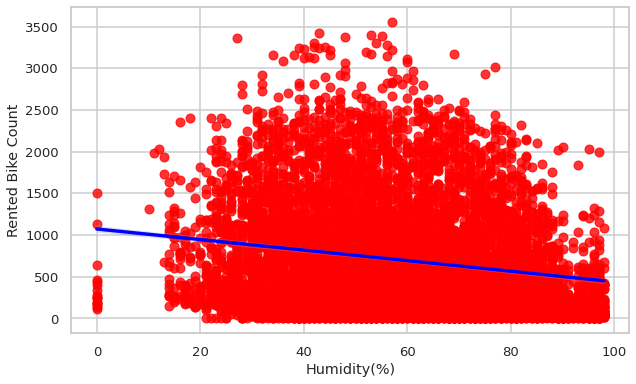

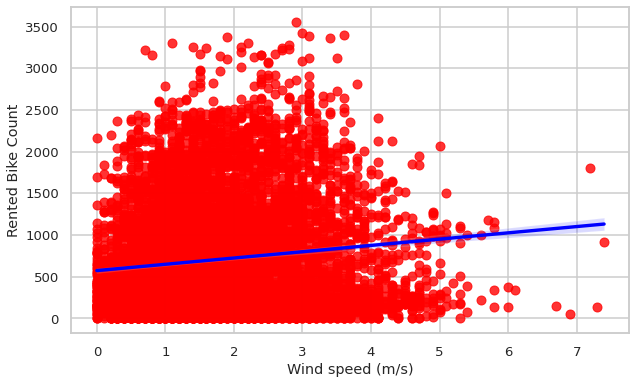

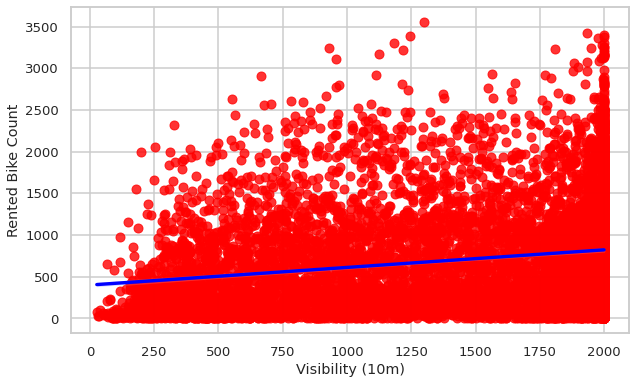

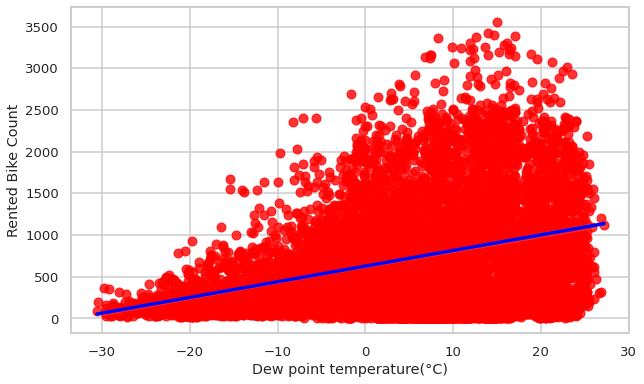

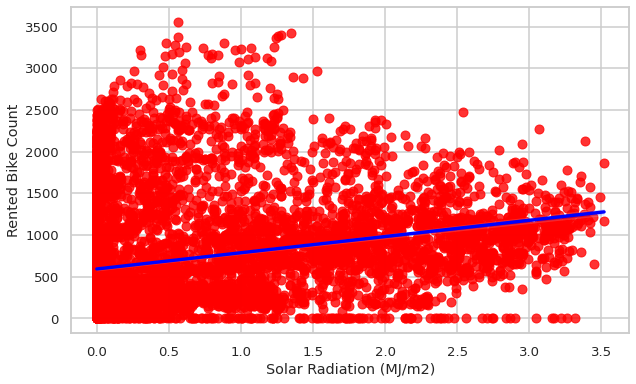

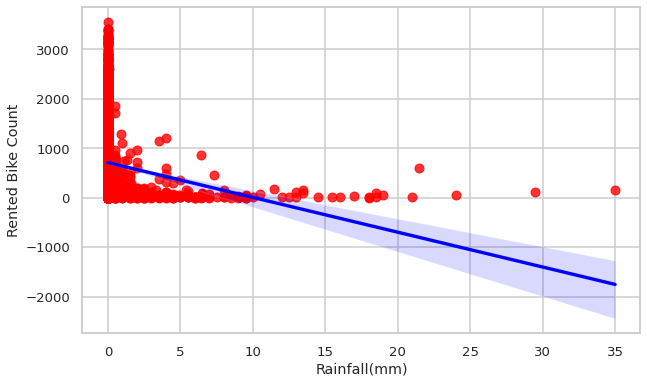

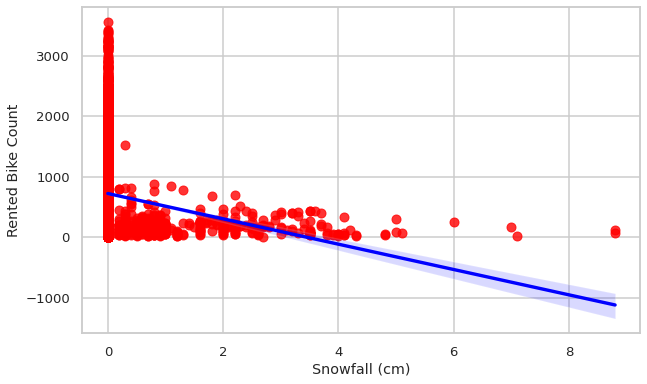

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=mydata_df[col],y=mydata_df['Rented Bike Count'],scatter_kws={"color":'red'},line_kws={"color":"blue"})



*   From the above regression plot of all numericals features we see that the columns 'Temperature','Wind_speed",Visibility','Drew point temperature','Solar radiation'are positively relayion to the target variable.
*   Which means the rented bike count increases with increase of thease features
*   'rainfall','snowfall','humidity'thease features are negaively related with the target variable which means the rented bike count decreases when thease features increases.



**NORMALISE RENTED BIKE COUNT DATA**

*   The data normalization (also referred to as data pre-processing)is a basic element of data mining. It means transforming the data,namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicate data.



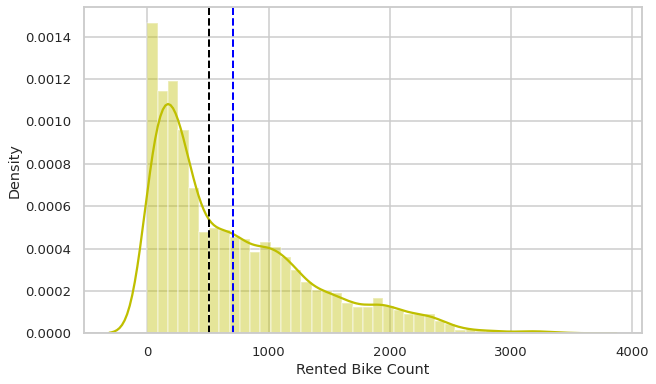

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(mydata_df['Rented Bike Count'],hist=True,color="y")
ax.axvline(mydata_df['Rented Bike Count'].mean(), color='blue',linestyle='dashed',linewidth=2)
ax.axvline(mydata_df['Rented Bike Count'].median(), color='black',linestyle='dashed',linewidth=2)
plt.show()

*  The above plot shows that Rented Bike Count has moderate right skewness, Since the assumption of linear regression is that the distribution of dependent variable has to be normal, so we should perform some operation to make it normal.

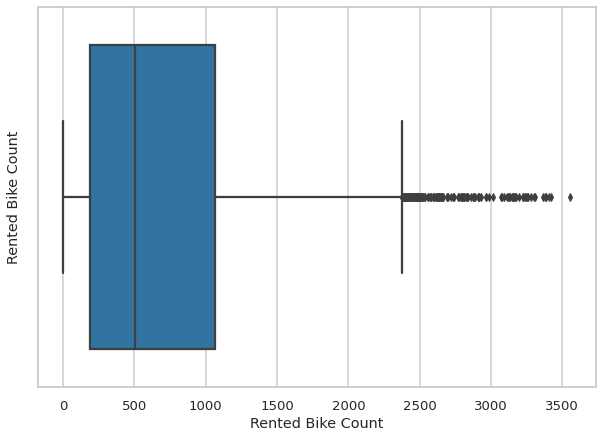

In [ ]:
#Boxplot of Rented Bike Count to check outliners
plt.figure(figsize=(10,7))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=mydata_df['Rented Bike Count'])
plt.show()

* The above boxplot shows that we have dected outliners in Rented Bike Count Coloumn

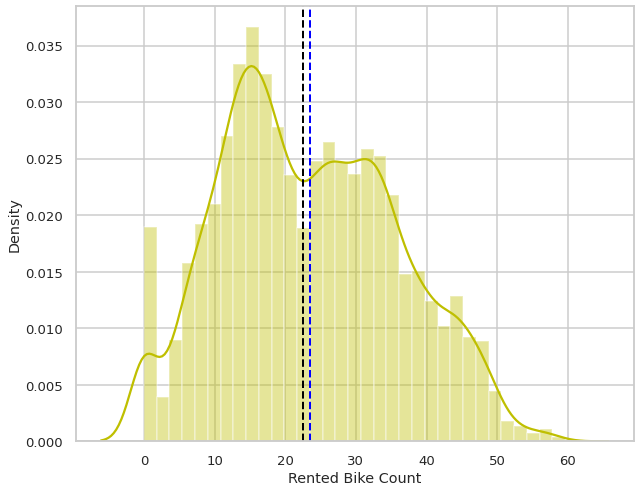

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(mydata_df['Rented Bike Count']),hist=True,color="y")
ax.axvline(np.sqrt(mydata_df['Rented Bike Count']).mean(), color='blue',linestyle='dashed',linewidth=2)
ax.axvline(np.sqrt(mydata_df['Rented Bike Count']).median(), color='black',linestyle='dashed',linewidth=2)

plt.show()

*  Since we have a rule of applying square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented count,here we get almost normal distribution.

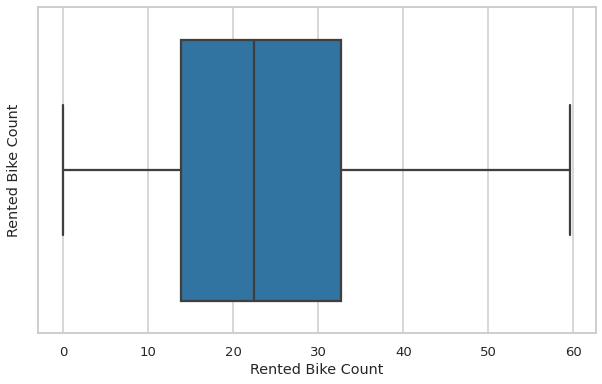

In [ ]:
#After applying sqrt on Rented Bike Count check weather we still have outliners
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(mydata_df['Rented Bike Count']))
plt.show()

In [ ]:
mydata_df.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


*   As we can see no outliners present


**CHECKING OF CORELLATION BETWEEN VARIABLES**

* Checking in OLS Model

  Ordinary least squares(OLS)regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable 

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X=mydata_df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
Y=mydata_df['Rented Bike Count']
mydata_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#add a constant column
x = sm.add_constant(X)
X

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
#fit a OLS model
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              2863.
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        08:15:31   Log-Likelihood:                         -66909.
No. Observations:                8760   AIC:                                  1.338e+05
Df Residuals:                    8752   BIC:                                  1.339e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Temperature(°C)              66.9774      1.648     40.647      0.000      63.747      70.207
Humidity(%)                  -1.2248      0.196     -6.250      0.000      -1.609      -0.841
Wind speed (m/s)             55.1557      5.671      9.727      0.000      44.040      66.271
Visibility (10m)              0.0199      0.010      1.924      0.054      -0.000       0.040
Dew point temperature(°C)   -33.5953      1.530    -21.957      0.000     -36.595     -30.596
Solar Radiation (MJ/m2)    -123.2678      8.683    -14.196      0.000    -140.289    -106.246
Rainfall(mm)                -56.0617      4.903    -11.434      0.000     -65.672     -46.451
Snowfall (cm)                33.4346     12.815      2.609      0.009       8.314      58.555
==============================================================================
Omnibus:                      964.502   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1585.356
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                       4.387   Cond. No.                     3.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



*   R square and adj Square are near to each other .40% of variance in the Rented count is explained by model.
*   For F static, P value is less than 0.05 for 5% level of significance.
*   P value of dew point temp and visibility are vey high and they are not significant.
*   Omnibus testes the skewness and kurtosis of the residuals.Here the value of Omnibus is high ..,it shows we have skewness in our data.
*   The condition number is large,3.11e+04.This might indicate that there are strong multicollinearity or other numerical problems
*   Durbin_Watson tests for autocorrelation of residuals.Here alue is less than 0.5.We can say that there exists a positive auto correlation among the variables.



In [ ]:
X.corr()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Temperature(°C),1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* From the OLS model we find that the 'Temperature'and 'Dew point temperature'are highly correlated so we need to drop one of them.
*For dropping the we check the (P>|t|)value from above the table and we can see that the 'Dew point temperature' value is higher so we need to drop Dew point temperature column.
* For clarity,we can use visualisation ex: heatmap.



**HEATMAP**

* It's graphical representation of correlation matrix representing correlation between different variables

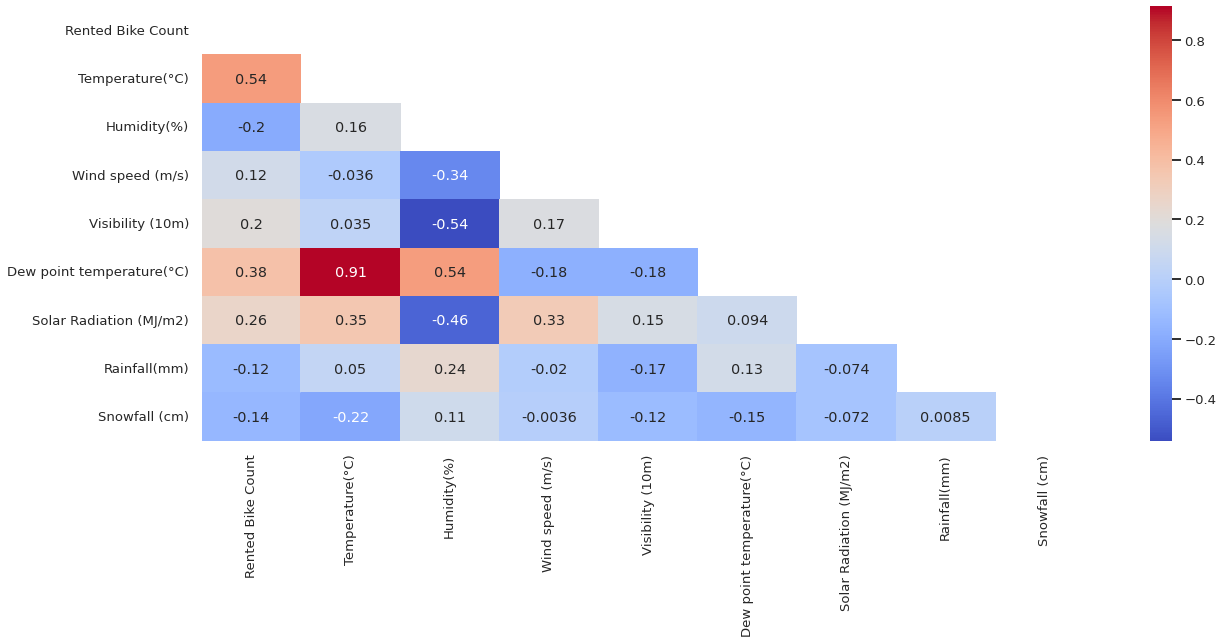

In [ ]:
## plot the correlation matrix
plt.figure(figsize=(20,8))
correlation=mydata_df.corr()
mask=np.triu(np.ones_like(correlation,dtype=bool))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are:

*   The temperature
*   The dew point Temperature
*   The soalr radiation

And most negatively correlated variable are:

*   Humidity
*   Rainfall


*  **From the above correlation heatmap,We can see there is a positive correlation between columns'Temperature'and'Dew point temperature i.e: if we drop this column this will not effect our aalysis**

In [ ]:
#drop the Dew point temperature column
mydata_df=mydata_df.drop(['Dew point temperature(°C)'],axis=1)

In [ ]:
mydata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

**CREATE THE DUMMY VARIABLE**

*  A dataset may contain various type of values ,sometimes it consists of categorical values. So,in-order to use those categorical value for programming efficiently we create dummy variables.

In [ ]:
#Assign all catagoricala features a variable
categorical_features=list(mydata_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

**One Hot Encoding**

It allows the representation of categorical data to be more expressive.Many machine learning algos cannot work with categorical data directly.The categories must be converted into numbers.This is required for both input and output variables the are categorical.

In [ ]:
#create a copy
mydata_df_copy = mydata_df

def one_hot_encoding(data,column):
  data = pd.concat([data,pd.get_dummies(data[column], prefix=column,drop_first=True)], axis=1)
  data = data.drop([column], axis=1)
  return data

  for col in categorical_features:
    mydata_df_copy = one_hot_encoding(mydata_df_copy,col)
    mydata_df_copy.head()

**MODEL TRAINING**

* TRAIN TEST SPLIT FOR REGRESSION
Before,fitting any model it is a rule of thumb to split the dataset into a training and test set.This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data.The proportions may vary from 60:40,70:25 depending on the person but mostly used is 80:20 for training and testing respectively.In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
# Assign the value in X and Y
x = mydata_df_copy.drop(columns=['Rented Bike Count'],axis=1)
y = np.sqrt(mydata_df_copy['Rented Bike Count'])

In [ ]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(6570, 14)
(2190, 14)


In [ ]:
mydata_df_copy.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')



*   The mean squared error (MSE)tells you how close a regression line is to set of points.It does this by taking the distances from the points to the regression line(these distances are the "errors")and squaring them.It's called the mean squared error as you're finding the average of a set of errors.The lower the MSE,the better the forecast.
*   MSE formula=(1/n)*Σ(actual-forecast)2 Where:
*   n = number of items.
*   Σ = summation notation
* Actual = original or observed y-value.
*Forecast = y-valuefrom regression
*Root Mean Square Error (RMSE) is standard deviation of the residuals(prediction errors)
*Mean Absolute Error(MAE)are metrics used to evaluate a Regression Model....Here,error are the differences between the predicted values (values predicted by our regression model)and the actual values of a variable.
*R-squared(R2)is a statical measure that represents the promotion of the vvariance for a dependent variable that's explained by an independent variable in a regression model.
* Formula for R-Squared
                          R^2 = 1 - \frac{RSS}{TSS}



**LINEAR REGRESSION**

* Linear regression uses a linear approach to model the relationship between independent and dependent variables.(Line drawn over the values of independent variables and dependent variable.)In case of single variables,the formula is same as straight line equation having an intercept and slope.


           y_pred = Β0 + Β1X

 **Data Exploration Conclusions**

* In this project, we explored several factors that influenced bike rental count. Below is a quick summary of 
exploratory data analysis 
*  Working or Non-working Day We see 2 rental patterns across the day in bike rentals count - first 
for a Working Day where the rental count high at peak office hours (8am and 5pm) and the second 
for a Non-working day where rental count is more or less uniform across the day with a peak at 
around noon. 
* Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, 
the count reaches a high point during peak hours on a working day and is mostly uniform during 
the day on a non-working day. 
* Casual and Registered Users: While most casual users are likely to be tourists whose rental count 
is high during non-working days, most registered users are most likely city natives whose rental count is high during working days. 
* Temperature: People generally prefer to bike at moderate to high temperatures. We see highest 
rental counts between 32 to 36 degrees Celsius 
* Season: We see highest number bike rentals in Fall (July to September) and Summer (April to June) 
Seasons and the lowest in Spring (January to March) season 
* Weather: As one would expect, we see highest number of bike rentals on a clear day and the lowest 
on a snowy or rainy day 
* Humidity: With increasing humidity, we see decrease in the number of bike rental count. 




**Limitations and Scope for Model Improvements**

 Below are few limitations in this analysis and ideas to improve model prediction accuracy 
* Since casual + registered = total count, we just predicted the total bike rental count by ignoring the 
casual and registered user information. Another (possibly better) method would be to train separate 
models for casual and registered users and add the two 
* Windspeed wasn’t used due to very low correlation. This might have been due to several instances 
where windspeed = 0. One possible method could be to first estimate those windspeed and then use 
it as a feature to estimate count. 
*  One limitation in the provided training data set is that it lacked data with extreme weather condition data (weather = 4). Hence, we had to modify it to weather = 3.